Sales management has gained importance to meet increasing competition and the
need for improved methods of distribution to reduce cost and to increase profits. Sales
management today is the most important function in a commercial and business
enterprise.
Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise
Find key metrics and factors and show the meaningful relationships between

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ydata_profiling import ProfileReport
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.cluster import KMeans
import plotly.express as px

In [12]:
# Load the dataset
data = pd.read_csv('Amazon Sales data.csv')

In [14]:
data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,5/28/2010,669165933,6/27/2010,9925,255.28,159.42,2533654.00,1582243.50,951410.50
1,Central America and the Caribbean,Grenada,Cereal,Online,C,8/22/2012,963881480,9/15/2012,2804,205.70,117.11,576782.80,328376.44,248406.36
2,Europe,Russia,Office Supplies,Offline,L,5/2/2014,341417157,5/8/2014,1779,651.21,524.96,1158502.59,933903.84,224598.75
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,6/20/2014,514321792,7/5/2014,8102,9.33,6.92,75591.66,56065.84,19525.82
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2/1/2013,115456712,2/6/2013,5062,651.21,524.96,3296425.02,2657347.52,639077.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,7/26/2011,512878119,9/3/2011,888,109.28,35.84,97040.64,31825.92,65214.72
96,Asia,Malaysia,Fruits,Offline,L,11/11/2011,810711038,12/28/2011,6267,9.33,6.92,58471.11,43367.64,15103.47
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,6/1/2016,728815257,6/29/2016,1485,154.06,90.93,228779.10,135031.05,93748.05
98,North America,Mexico,Personal Care,Offline,M,7/30/2015,559427106,8/8/2015,5767,81.73,56.67,471336.91,326815.89,144521.02


In [18]:
# Generate a profiling report
profile = ProfileReport(data, title="Amazon Sales Data Report")
profile.to_file("amazon_sales_data_report.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

C:\Users\uzman\anaconda3\Lib\site-packages\ydata_profiling\model\correlations.py:66: UserWarning: There was an attempt to calculate the auto correlation, but this failed.
To hide this warning, disable the calculation
(using `df.profile_report(correlations={"auto": {"calculate": False}})`
If this is problematic for your use case, please report this as an issue:
https://github.com/ydataai/ydata-profiling/issues
(include the error message: 'could not convert string to float: 'Baby Food'')
  warnings.warn(


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [272]:
import sweetviz as sv

# Analyzing the dataset
report = sv.analyze(data)

# Display the report
# report.show_notebook()  # integrated report in notebook

report.show_html('EDAreport.html')

                                             |          | [  0%]   00:00 -> (? left)

Report EDAreport.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
# Data Cleaning and Transformation
data['Order Date'] = pd.to_datetime(data['Order Date'])
data['Ship Date'] = pd.to_datetime(data['Ship Date'])

In [18]:
# Create new features
data['Order Month'] = data['Order Date'].dt.month
data['Order Year'] = data['Order Date'].dt.year

In [20]:
# Fill missing values if any
data.fillna(0, inplace=True)

In [24]:
# ETL: Transform and Load (Store the transformed data)
transformed_data = data.copy()
transformed_data.to_csv('transformed_amazon_sales_data.csv', index=False)

In [26]:
transformed_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015


Do ETL: Extract-Transform-Load some Amazon dataset and find for me
Sales-trend -> month-wise, year-wise, yearly_month-wise

In [28]:
# Sales Trend Analysis
# Month-wise Analysis
monthly_sales = data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()
monthly_sales['Date'] = pd.to_datetime(monthly_sales['Order Year'].astype(str) + '-' + monthly_sales['Order Month'].astype(str))

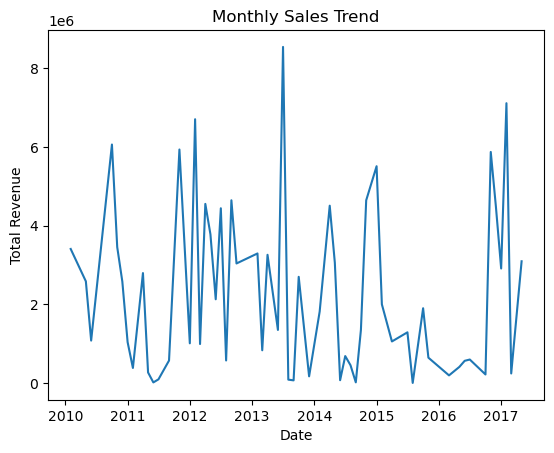

In [30]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming you have a DataFrame 'df' with 'Date' and 'Total Revenue' columns
sns.lineplot(data=monthly_sales, x='Date', y='Total Revenue')
plt.title('Monthly Sales Trend')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.show()

In [32]:
# Year-wise Analysis
yearly_sales = data.groupby('Order Year')['Total Revenue'].sum().reset_index()

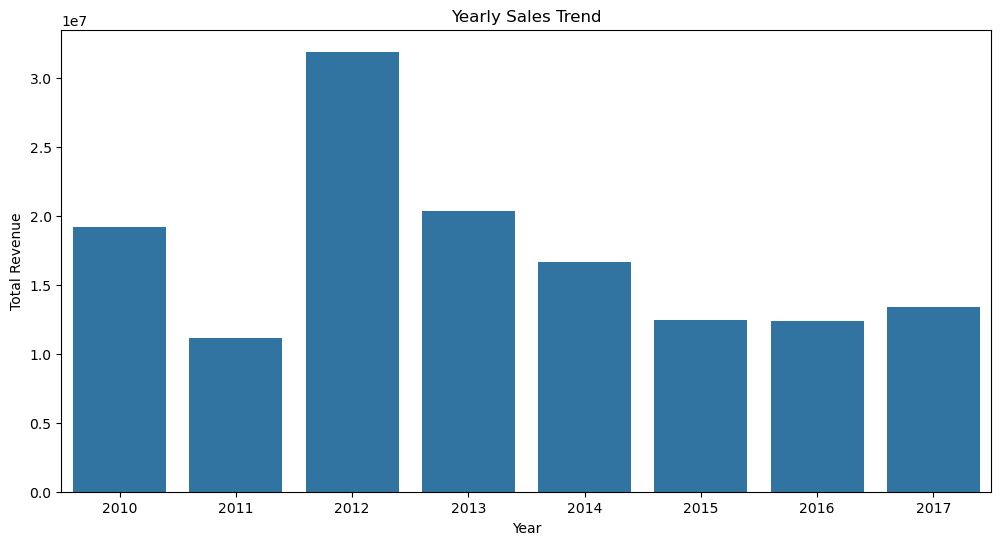

In [34]:
# Visualize yearly sales trends
plt.figure(figsize=(12, 6))
sns.barplot(data=yearly_sales, x='Order Year', y='Total Revenue')
plt.title('Yearly Sales Trend')
plt.xlabel('Year')
plt.ylabel('Total Revenue')
plt.show()

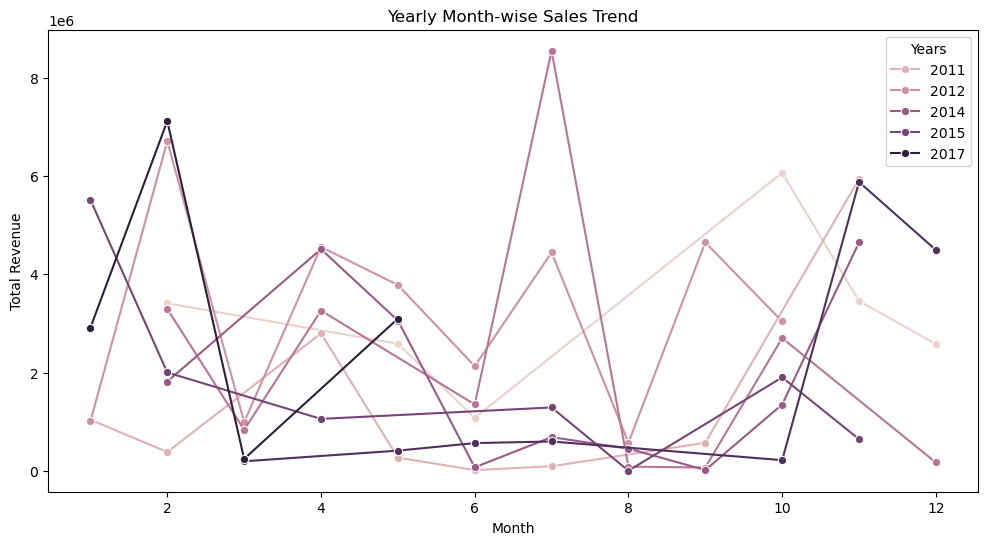

In [36]:
# Yearly Month-wise Analysis
yearly_monthly_sales = data.groupby(['Order Year', 'Order Month'])['Total Revenue'].sum().reset_index()

# Visualize the combined trend to identify seasonal patterns
plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_monthly_sales, x='Order Month', y='Total Revenue', hue='Order Year', marker='o')
plt.title('Yearly Month-wise Sales Trend')
plt.xlabel('Month')
plt.ylabel('Total Revenue')
plt.legend(title='Years')
plt.show()

In [38]:
data.describe()

,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
count,100,1.000000e+02,100,100.000000,100.000000,100.000000,1.000000e+02,1.000000e+02,1.000000e+02,100.000000,100.000000
mean,2013-09-16 14:09:36,5.550204e+08,2013-10-09 22:48:00,5128.710000,276.761300,191.048000,1.373488e+06,9.318057e+05,4.416820e+05,6.260000,2013.230000
min,2010-02-02 00:00:00,1.146066e+08,2010-02-25 00:00:00,124.000000,9.330000,6.920000,4.870260e+03,3.612240e+03,1.258020e+03,1.000000,2010.000000
25%,2012-02-14 12:00:00,3.389225e+08,2012-02-24 18:00:00,2836.250000,81.730000,35.840000,2.687212e+05,1.688680e+05,1.214436e+05,4.000000,2012.000000
50%,2013-07-12 12:00:00,5.577086e+08,2013-08-11 12:00:00,5382.500000,179.880000,107.275000,7.523144e+05,3.635664e+05,2.907680e+05,6.000000,2013.000000
75%,2015-04-07 00:00:00,7.907551e+08,2015-04-28 00:00:00,7369.000000,437.200000,263.330000,2.212045e+06,1.613870e+06,6.358288e+05,9.250000,2015.000000
max,2017-05-22 00:00:00,9.940222e+08,2017-06-17 00:00:00,9925.000000,668.270000,524.960000,5.997055e+06,4.509794e+06,1.719922e+06,12.000000,2017.000000
std,NaN,2.606153e+08,NaN,2794.484562,235.592241,188.208181,1.460029e+06,1.083938e+06,4.385379e+05,3.353334,2.088231


In [40]:
transformed_data

,Region,Country,Item Type,Sales Channel,Order Priority,Order Date,Order ID,Ship Date,Units Sold,Unit Price,Unit Cost,Total Revenue,Total Cost,Total Profit,Order Month,Order Year
0,Australia and Oceania,Tuvalu,Baby Food,Offline,H,2010-05-28,669165933,2010-06-27,9925,255.28,159.42,2533654.00,1582243.50,951410.50,5,2010
1,Central America and the Caribbean,Grenada,Cereal,Online,C,2012-08-22,963881480,2012-09-15,2804,205.70,117.11,576782.80,328376.44,248406.36,8,2012
2,Europe,Russia,Office Supplies,Offline,L,2014-05-02,341417157,2014-05-08,1779,651.21,524.96,1158502.59,933903.84,224598.75,5,2014
3,Sub-Saharan Africa,Sao Tome and Principe,Fruits,Online,C,2014-06-20,514321792,2014-07-05,8102,9.33,6.92,75591.66,56065.84,19525.82,6,2014
4,Sub-Saharan Africa,Rwanda,Office Supplies,Offline,L,2013-02-01,115456712,2013-02-06,5062,651.21,524.96,3296425.02,2657347.52,639077.50,2,2013
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Sub-Saharan Africa,Mali,Clothes,Online,M,2011-07-26,512878119,2011-09-03,888,109.28,35.84,97040.64,31825.92,65214.72,7,2011
96,Asia,Malaysia,Fruits,Offline,L,2011-11-11,810711038,2011-12-28,6267,9.33,6.92,58471.11,43367.64,15103.47,11,2011
97,Sub-Saharan Africa,Sierra Leone,Vegetables,Offline,C,2016-06-01,728815257,2016-06-29,1485,154.06,90.93,228779.10,135031.05,93748.05,6,2016
98,North America,Mexico,Personal Care,Offline,M,2015-07-30,559427106,2015-08-08,5767,81.73,56.67,471336.91,326815.89,144521.02,7,2015


In [42]:
from feature_engine.outliers import Winsorizer

In [76]:
# Key Metrics Identification
total_sales = data['Total Revenue'].sum()
average_order_value = data['Total Revenue'].mean()
profit_margin = data['Total Profit'].sum() / data['Total Revenue'].sum()

top_selling_items = data.groupby('Item Type')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_selling_regions = data.groupby('Region')['Total Revenue'].sum().sort_values(ascending=False).head(10)
top_sales_channels = data.groupby('Sales Channel')['Total Revenue'].sum().sort_values(ascending=False)

print(f"Total Sales: {total_sales}")
print(f"Average Order Value: {average_order_value}")
print(f"Profit Margin: {profit_margin}")
print("Top Selling Items:\n", top_selling_items)
print("Top Selling Regions:\n", top_selling_regions)
print("Top Sales Channels:\n", top_sales_channels)

Total Sales: 137348768.31
Average Order Value: 1373487.6831
Profit Margin: 0.321576952916761
Top Selling Items:
 Item Type
Cosmetics          36601509.60
Office Supplies    30585380.07
Household          29889712.29
Baby Food          10350327.60
Clothes             7787292.80
Cereal              5322898.90
Meat                4503675.75
Personal Care       3980904.84
Vegetables          3089057.06
Beverages           2690794.60
Name: Total Revenue, dtype: float64
Top Selling Regions:
 Region
Sub-Saharan Africa                   39672031.43
Europe                               33368932.11
Asia                                 21347091.02
Australia and Oceania                14094265.13
Middle East and North Africa         14052706.58
Central America and the Caribbean     9170385.49
North America                         5643356.55
Name: Total Revenue, dtype: float64
Top Sales Channels:
 Sales Channel
Offline    79094809.20
Online     58253959.11
Name: Total Revenue, dtype: float64


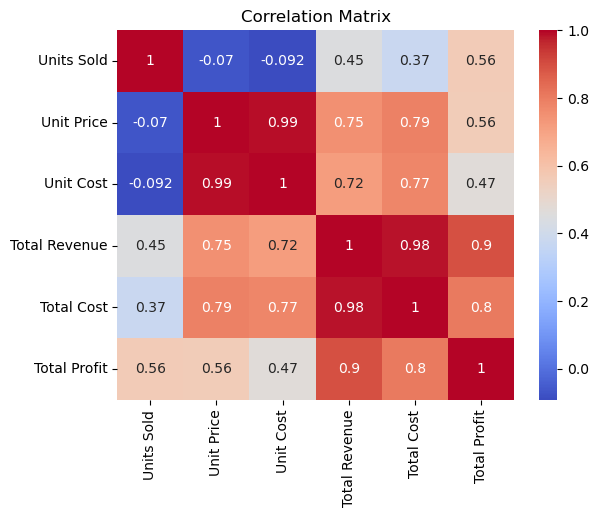

In [120]:
correlation_matrix = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue', 'Total Cost', 'Total Profit']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [96]:
# Machine Learning Models
# Regression Models
X = data[['Units Sold', 'Unit Price', 'Unit Cost']]
y = data['Total Revenue']

In [174]:
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import make_pipeline

Machine Learning Models
Regression Models

In [86]:
# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [296]:
degree = 1
linear_model = make_pipeline(PolynomialFeatures(degree), StandardScaler(), LinearRegression())

In [299]:
# Linear Regression
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
linear_predictions = linear_model.predict(X_test)

In [301]:
mse_poly = mean_squared_error(y_test, linear_predictions)
r2_poly = r2_score(y_test, linear_predictions)
print("Mean Squared Error (Polynomial Regression):", mse_poly)
print("R-squared (Polynomial Regression):", r2_poly)

Mean Squared Error (Polynomial Regression): 322510611072.7175
R-squared (Polynomial Regression): 0.8543165315212506


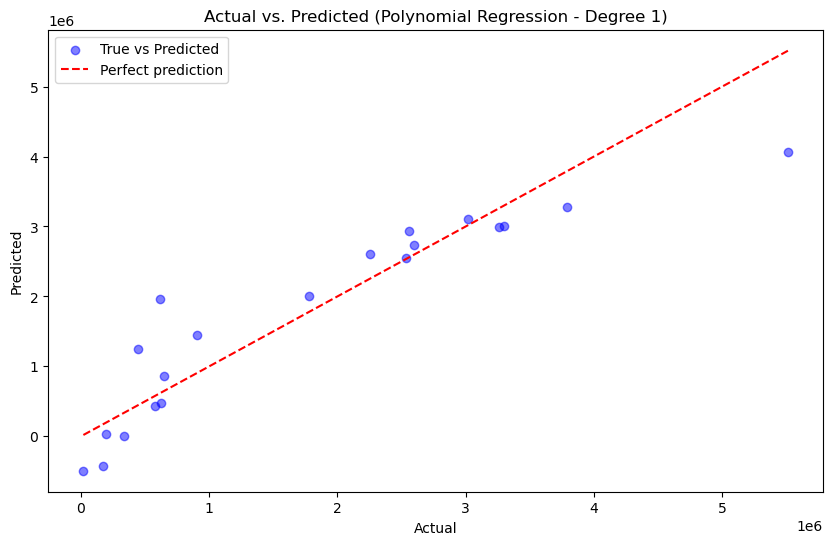

In [313]:
plt.figure(figsize=(10, 6))
plt.scatter(y_test, linear_predictions,color='blue', label='True vs Predicted', alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], linestyle='--', color='red', label='Perfect prediction')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title(f'Actual vs. Predicted (Polynomial Regression - Degree {degree})')
plt.legend()
plt.show()

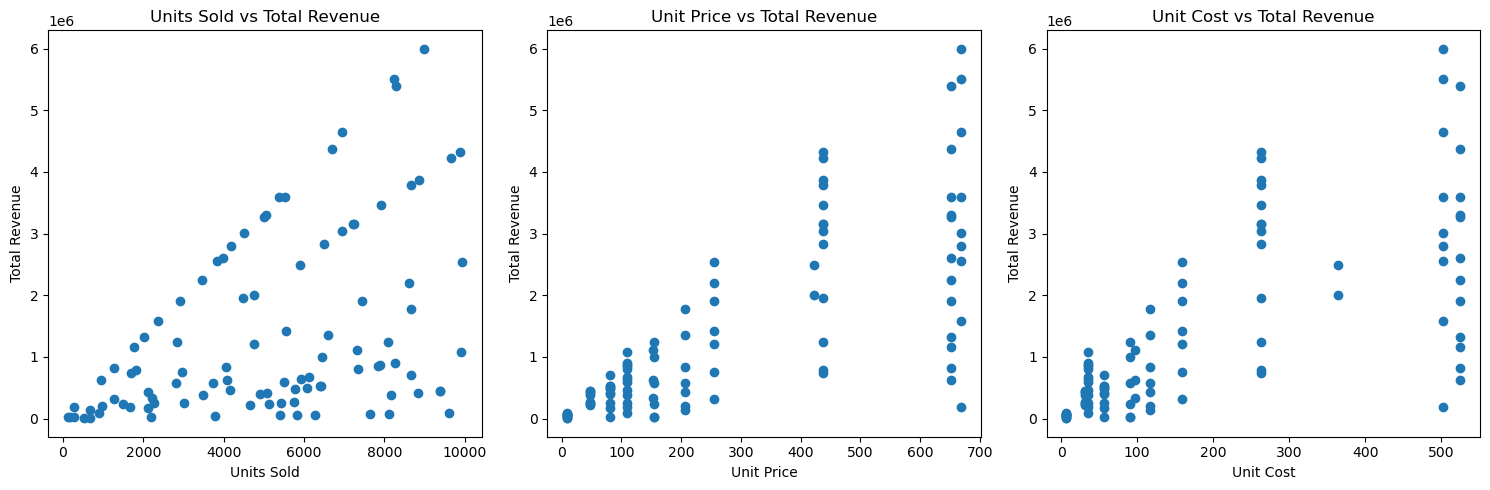

In [51]:
import matplotlib.pyplot as plt

# Scatter plot for each pair of columns against 'Total Revenue'
plt.figure(figsize=(15, 5))

# Units Sold vs Total Revenue
plt.subplot(1, 3, 1)
plt.scatter(data['Units Sold'], data['Total Revenue'])
plt.title('Units Sold vs Total Revenue')
plt.xlabel('Units Sold')
plt.ylabel('Total Revenue')

# Unit Price vs Total Revenue
plt.subplot(1, 3, 2)
plt.scatter(data['Unit Price'], data['Total Revenue'])
plt.title('Unit Price vs Total Revenue')
plt.xlabel('Unit Price')
plt.ylabel('Total Revenue')

# Unit Cost vs Total Revenue
plt.subplot(1, 3, 3)
plt.scatter(data['Unit Cost'], data['Total Revenue'])
plt.title('Unit Cost vs Total Revenue')
plt.xlabel('Unit Cost')
plt.ylabel('Total Revenue')

plt.tight_layout()
plt.show()


In [64]:
np.corrcoef(data['Total Revenue'], data['Units Sold'])

array([[1.        , 0.44778449],
       [0.44778449, 1.        ]])

In [106]:
np.corrcoef(data['Total Revenue'], data['Unit Price'])

array([[1.       , 0.7523596],
       [0.7523596, 1.       ]])

In [108]:
np.corrcoef(data['Total Revenue'], data['Unit Cost'])

array([[1.        , 0.71562263],
       [0.71562263, 1.        ]])

In [66]:
cov_output = np.cov(data['Total Revenue'],  data['Units Sold'])[0, 1]
cov_output

1826973115.3233325

In [110]:
cov_output = np.cov(data['Total Revenue'],  data['Unit Price'])[0, 1]
cov_output

258790212.48195863

In [112]:
cov_output = np.cov(data['Total Revenue'],  data['Unit Cost'])[0, 1]
cov_output

196645475.6094063

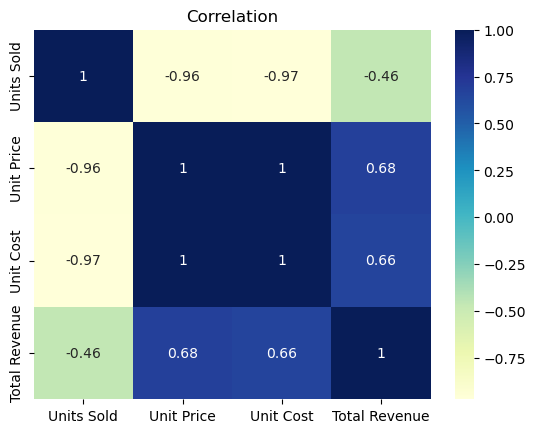

In [122]:
data2 = data[['Units Sold', 'Unit Price', 'Unit Cost', 'Total Revenue']].corr()
sns.heatmap(data2.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation')
plt.show()

In [267]:
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [279]:
# Random Forest Regression
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)

In [281]:
# R squared error
error_score = metrics.r2_score(y_test, rf_predictions)
print("R squared error : ", error_score)

R squared error :  0.9649714492673243


In [283]:
y_test_list = list(y_test)

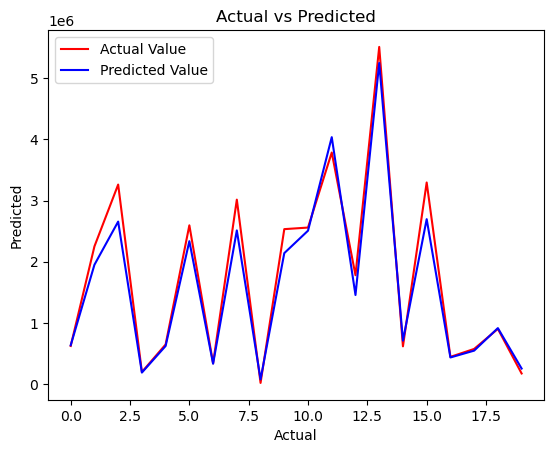

In [285]:
plt.plot(y_test_list, color='red', label = 'Actual Value')
plt.plot(rf_predictions, color='blue', label='Predicted Value')
plt.title('Actual vs Predicted')
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.legend()
plt.show()

In [268]:
# Clustering Models
# K-Means Clustering
clustering_features = data[['Units Sold', 'Total Revenue', 'Total Profit']]
kmeans = KMeans(n_clusters=3, random_state=42)
data['Cluster'] = kmeans.fit_predict(clustering_features)

C:\Users\uzman\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


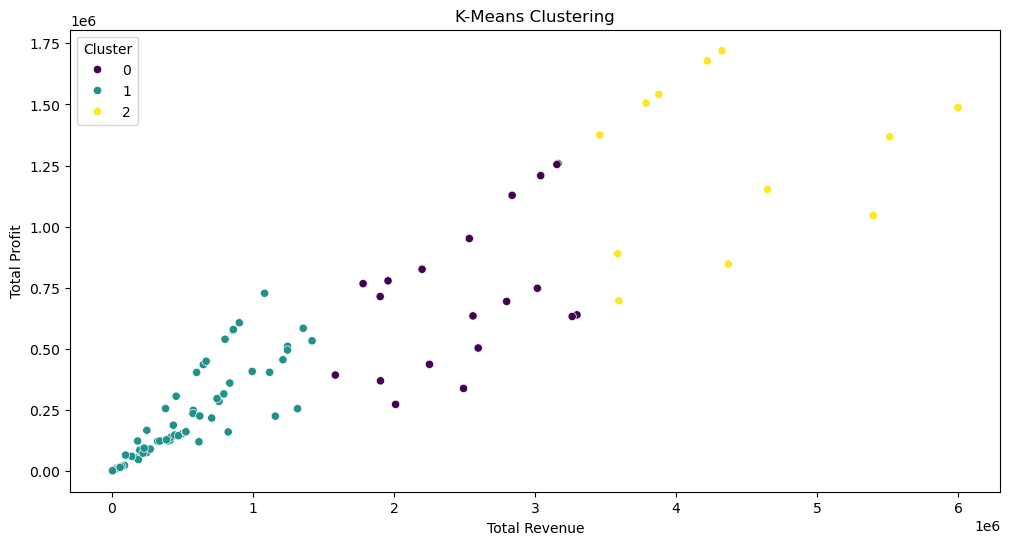

In [66]:
# Visualizing Clusters
plt.figure(figsize=(12, 6))
sns.scatterplot(data=data, x='Total Revenue', y='Total Profit', hue='Cluster', palette='viridis')
plt.title('K-Means Clustering')
plt.xlabel('Total Revenue')
plt.ylabel('Total Profit')
plt.legend(title='Cluster')
plt.show()

In [ ]:
# Save the transformed data with clusters
data.to_csv('/mnt/data/clustered_amazon_sales_data.csv', index=False)